1681 <class 'int'> (1681, 8)
Train on 1512 samples, validate on 169 samples
Epoch 1/50
 - 1s - loss: 0.2280 - val_loss: 0.3938
Epoch 2/50
 - 0s - loss: 0.2143 - val_loss: 0.3707
Epoch 3/50
 - 0s - loss: 0.2018 - val_loss: 0.3487
Epoch 4/50
 - 0s - loss: 0.1896 - val_loss: 0.3277
Epoch 5/50
 - 0s - loss: 0.1784 - val_loss: 0.3086
Epoch 6/50
 - 0s - loss: 0.1680 - val_loss: 0.2920
Epoch 7/50
 - 0s - loss: 0.1574 - val_loss: 0.2760
Epoch 8/50
 - 0s - loss: 0.1471 - val_loss: 0.2603
Epoch 9/50
 - 0s - loss: 0.1366 - val_loss: 0.2430
Epoch 10/50
 - 0s - loss: 0.1266 - val_loss: 0.2259
Epoch 11/50
 - 0s - loss: 0.1171 - val_loss: 0.2103
Epoch 12/50
 - 0s - loss: 0.1097 - val_loss: 0.1932
Epoch 13/50
 - 0s - loss: 0.1045 - val_loss: 0.1788
Epoch 14/50
 - 0s - loss: 0.1000 - val_loss: 0.1665
Epoch 15/50
 - 0s - loss: 0.0960 - val_loss: 0.1562
Epoch 16/50
 - 0s - loss: 0.0923 - val_loss: 0.1471
Epoch 17/50
 - 0s - loss: 0.0888 - val_loss: 0.1389
Epoch 18/50
 - 0s - loss: 0.0855 - val_loss: 0.13

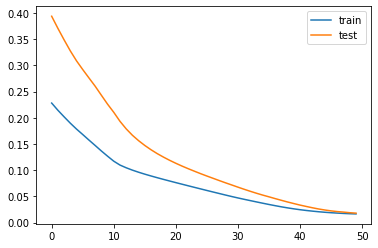

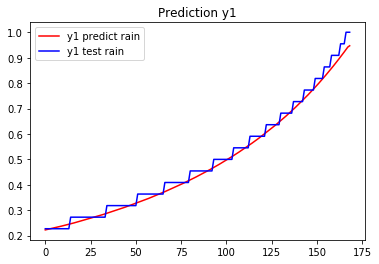

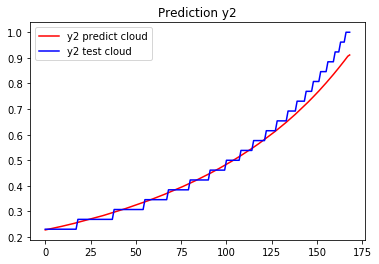

***Test RMSE: 6.891***


In [5]:
from pandas import read_csv
from datetime import datetime
# load data
#def parse(x):
#	return datetime.strptime(x, '%Y %m %d %H')
dataset = read_csv('simulator.ver1.csv', index_col=-1)

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# load dataset
dataset = read_csv('simulator.ver1.csv', header=0)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# split into train and test sets
n = scaled.shape[0]
print(n, type(n), scaled.shape)
train = scaled[:int(n*0.9), :]
test = scaled[int(n*0.9):, :]
# split into input and outputs
train_X, train_y = train[:, :-2], train[:, -2:]
test_X, test_y = test[:, :-2], test[:, -2:]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

model = Sequential()
model.add(LSTM(train_X.shape[2], input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(2))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)

# Graph 1
pyplot.title("Prediction y1")
pyplot.plot(yhat[:, 0], 'red', label='y1 predict rain')
pyplot.plot(test_y[:, 0], 'blue', label='y1 test rain')
pyplot.legend()
pyplot.show()
# Graph 2
pyplot.title("Prediction y2")
pyplot.plot(yhat[:, 1], 'red', label='y2 predict cloud')
pyplot.plot(test_y[:, 1], 'blue', label='y2 test cloud')
pyplot.legend()
pyplot.show()

test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, :]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 2))
inv_y = concatenate((test_y, test_X[:, :]), axis=1)


inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('***Test RMSE: %.3f***' % rmse)

